In [1]:
import numpy as np
import matplotlib.pyplot as plt
from swim import double_well, simple_md

np.set_printoptions(precision=5)

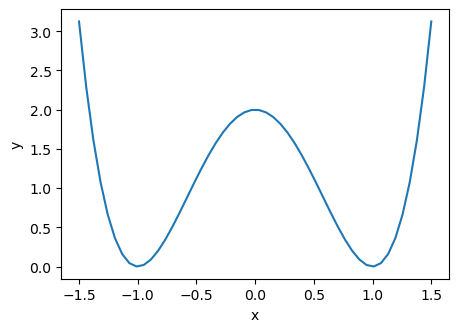

In [2]:
dw = double_well()
dw.param = {'B':2, 'x0':1}

x_arr = np.linspace(-1.5, 1.5, 50)
y_arr = dw.act(x_arr)

fig, ax = plt.subplots(figsize=(5,3.5), nrows=1, ncols=1)
ax.plot(x_arr, y_arr)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [13]:
dw = double_well()
dw.param = {'B':2., 'x0':1.}

md = simple_md(seed=45932)
md.set_param(dt=0.01, damping=10.)
md.set_init_x(-1.06)

md.external_pe = [dw]
md.run(int(1e6))

In [ ]:
x = [row[1] for row in md.traj]

hist = np.histogram(x, bins=30)
prob = hist[0]/np.sum(hist[0])
mids = 0.5*(hist[1][:-1]+hist[1][1:])
free_energy = -md.kT*np.log(prob+1e-11)
free_energy -= np.min(free_energy)

fig, ax = plt.subplots(figsize=(5,3.5), nrows=1, ncols=1)
ax.plot(mids, free_energy)
ax.plot(x_arr, y_arr)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(0, 3)

ax.set_xlabel('x')
ax.set_ylabel('Free energy')
plt.show()

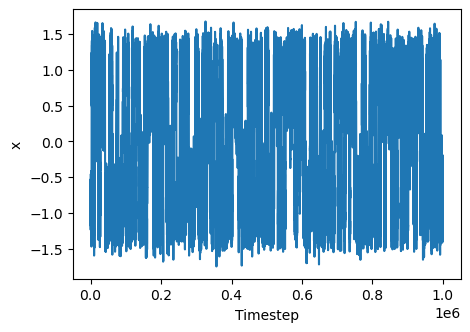

In [15]:
x = [row[1] for row in md.traj]

fig, ax = plt.subplots(figsize=(5,3.5), nrows=1, ncols=1)
ax.plot(x)
ax.set_xlabel('Timestep')
ax.set_ylabel('x')
plt.show()

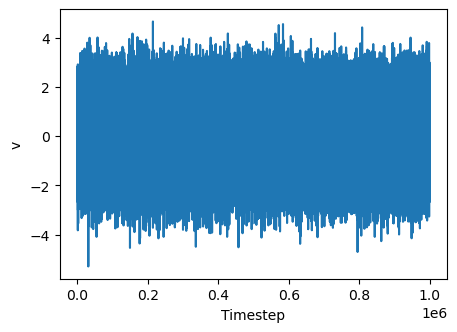

In [17]:
v = [row[2] for row in md.traj]

fig, ax = plt.subplots(figsize=(5,3.5), nrows=1, ncols=1)
ax.plot(v)
ax.set_xlabel('Timestep')
ax.set_ylabel('v')
plt.show()